## Import necessary libraries 

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib import rcParams

In [2]:
#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

human = pd.concat([train,test])

In [4]:
human.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,5.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,5.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,5.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,5.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,5.0,STANDING


In [5]:
human.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [6]:
human.columns.shape

(564,)

In [7]:
human.shape

(1075, 564)

### Checking For Nulls  

In [8]:
human.isnull().any().sum()

544

In [9]:
human = human.dropna(axis = 0)

In [10]:
human.ActivityName.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
human.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,5.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,5.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,5.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,5.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,5.0,STANDING


In [12]:
print(human.ActivityName.value_counts())


STANDING              208
SITTING               193
WALKING               192
LAYING                190
WALKING_UPSTAIRS      152
WALKING_DOWNSTAIRS    138
Name: ActivityName, dtype: int64


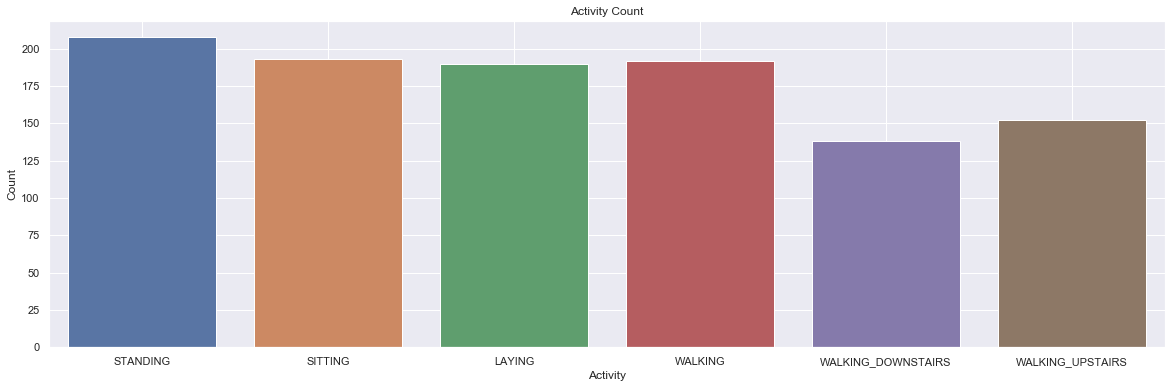

In [13]:
sns.set(rc={'figure.figsize':(20,6)})
fig = sns.countplot(x = "ActivityName" , data = human)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

### Splitting data into train and test data sets 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 


train, test = train_test_split(human, test_size=0.3) 


print(train.shape , test.shape)

(751, 564) (322, 564)


In [15]:
train_x = human.drop(['Activity','ActivityName'], axis = 1)
train_y = human.Activity

test_x = human.drop(['Activity','ActivityName'], axis = 1)
test_y = human.Activity

### Applying Machine Learning Algorithms  

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9972041006523765


### K-Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20) 
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9440820130475303


### Support Vector Machine 

In [18]:
from sklearn import svm 
svm_model = svm.SVC() 

svm_model.fit(train_x, train_y)

prediction = svm_model.predict(test_x)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) 

The accuracy of the SVM is:  0.9524697110904008


### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('the accuracy of Decision tree classifier is:' ,metrics.accuracy_score(prediction,test_y))


result = model.predict([[0.28602671,-0.013163359,-0.11908252,-0.97541469,-0.9674579,-0.94495817,-0.9867988,-0.96840133,-0.9458234,-0.89408755,-0.55457721,-0.80601325,0.76803131,0.68369799,0.79670578,-0.96909654,-0.99957952,-0.99964558,-0.99772028,-0.9940063,-0.97363671,-0.95071985,-0.30243696,-0.34824317,-0.40478535,0.5074924,-0.15649451,0.040673682,0.27299122,0.19756581,-0.19455563,0.41141089,-0.3404662,0.07755506,-0.084024482,0.035304993,-0.010082532,-0.1049829,-0.42913351,0.39917698,0.92740359,-0.28921515,0.15256831,-0.98905711,-0.9838872,-0.96478113,-0.98899958,-0.98315936,-0.96520631,0.85617578,-0.30487004,0.15289519,0.9444614,-0.26215956,0.14901318,0.057676487,0.80557472,-0.85816306,-0.95723959,-0.98840345,-0.98168751,-0.97121523,-0.72888396,-1.0,-0.46504709,-0.50988188,0.52542419,-0.54024472,0.55444699,-0.74568691,0.73317067,-0.73739047,0.74869829,-0.8451508,0.86929012,-0.89306457,0.91311888,0.94523268,-0.9114153,-0.73853452,0.070180689,-0.017876016,-0.0017206291,-0.94920395,-0.97269891,-0.9777267,-0.96931198,-0.97372273,-0.97861789,-0.91509297,-0.98124288,-0.97767968,0.89847935,0.96773819,0.96609479,-0.97430719,-0.99837377,-0.99936483,-0.99942623,-0.97974224,-0.97909583,-0.98526293,-0.49723319,-0.65575119,-0.6144241,0.3979661,0.29974329,0.23919281,0.36635961,0.21215592,-0.18363333,0.50841803,0.23214979,-0.0028318903,-0.038097032999999995,-0.082656991,0.1015615,-0.15319717,-0.27996556,0.49761213,-0.0015524629,-0.18729119,0.18070522,-0.92556647,-0.9295992,-0.96758097,-0.91785483,-0.9500255,-0.96703476,-0.81033667,-0.86987891,-0.70321219,0.82303253,0.87078027,0.8440353,-0.88875689,-0.99691861,-0.99519449,-0.99594793,-0.91132238,-0.96068474,-0.9692744,-0.018361191000000002,-0.85159109,0.30504741,-0.2470263,0.3089064,-0.4820437,0.50874888,-0.25023745,0.19068988,-0.13627272,0.19949752,-0.011898633999999998,-0.13845696,0.33537089,-0.27653307,-0.0029727858,0.54181281,-0.53396236,-0.13866849,-0.025802071,-0.071418405,-0.96230415,-0.95628941,-0.98134077,-0.96861415,-0.97402395,-0.9821632,-0.95925594,-0.95113178,-0.97956968,0.94972586,0.92982517,0.97707817,-0.97512556,-0.99913331,-0.99894037,-0.99971914,-0.97552795,-0.98727568,-0.98252604,-0.29249393,-0.14390965,-0.38607798,-0.052974102,0.20970463,-0.11165626,-0.25754483,-0.19712748,0.25112852,-0.048357479,0.15821812,0.15886386,-0.23110857,0.31568162,0.14344499,0.28485043,-0.17115207,-0.24811318,-0.96896136,-0.95390243,-0.9631648,-0.93760822,-0.98594423,-0.96896136,-0.99891989,-0.97621997,-0.32934503,0.45848929,-0.45648942,0.48812207,-0.34826197,-0.96896136,-0.95390243,-0.9631648,-0.93760822,-0.98594423,-0.96896136,-0.99891989,-0.97621997,-0.32934503,0.45848929,-0.45648942,0.48812207,-0.34826197,-0.97371675,-0.94100781,-0.95965336,-0.92883747,-0.97501109,-0.97371675,-0.99878975,-0.97808074,-0.52770828,-0.31861692,0.18419955,-0.4600965,0.71335686,-0.89843314,-0.91085833,-0.90111039,-0.90243173,-0.89375272,-0.89843314,-0.99418034,-0.91018512,0.39460411,0.030128461000000002,-0.037523895,0.081124765,-0.22204048,-0.97339341,-0.94409,-0.96062105,-0.92928731,-0.97636665,-0.97339341,-0.99908562,-0.98440919,-0.18620412,0.032238715,0.010253069,-0.65001828,0.52648944,-0.96090303,-0.96443332,-0.95667485,-0.98434996,-0.97017476,-0.94186191,-0.97576424,-0.97025651,-0.94424865,-0.99305058,-0.97435703,-0.94267037,-0.97244987,-0.98560555,-0.99954429,-0.9576235,-0.99959226,-0.99914881,-0.99759946,-0.95503227,-0.97100249,-0.96622982,-0.60401282,-0.7868864,-0.61029779,-0.80645161,-1.0,-1.0,0.35206637,0.17454676,-0.32067339,-0.91817642,-0.99876166,-0.32635354,-0.65708714,-0.32768638,-0.62740522,-0.99985038,-0.99958185,-0.99871827,-0.99785674,-0.99618566,-0.99772986,-0.99923826,-0.9998986,-0.99975978,-0.99826642,-0.99677956,-0.9994596,-0.9996875,-0.99692971,-0.99914154,-0.99971528,-0.99955092,-0.99864504,-0.99975136,-0.99958403,-0.99909598,-0.99941708,-0.99921232,-0.99918197,-0.99969127,-0.99920247,-0.9992024,-0.99892292,-0.9971858,-0.99925119,-0.99969618,-0.99973917,-0.99944873,-0.99931302,-0.99910767,-0.99999943,-0.99754011,-0.99974512,-0.99942008,-0.99937662,-0.99758464,-0.99966494,-0.94351902,-0.96916232,-0.97344886,-0.9616312,-0.98002631,-0.9807873,-0.94581039,-0.97727429,-0.9771656,-0.97739496,-0.98708657,-0.98420241,-0.97856685,-0.95346874,-0.99666442,-0.95549103,-0.99837082,-0.99936709,-0.99942621,-0.92959842,-0.97323045,-0.97314572,-0.60663326,-1.0,-0.94221628,-0.16,-0.32,-0.4,0.47285157,0.16719768,-0.24311457,-0.92564669,-0.96585813,-0.72081204,-0.99244457,-0.76472733,-0.94477245,-0.9999176,-0.99949503,-0.99864617,-0.9977,-0.99590186,-0.9967749,-0.99882253,-0.99993425,-0.99964085,-0.99792454,-0.99593387,-0.99883025,-0.9991966,-0.99558152,-0.99940718,-0.99975774,-0.99955405,-0.99921997,-0.99954062,-0.99895241,-0.9984723,-0.99900669,-0.99964754,-0.99931592,-0.99922621,-0.99854372,-0.99954931,-0.99923397,-0.99822495,-0.99913438,-0.99970708,-0.99969529,-0.99944774,-0.99928606,-0.99849709,-0.99998246,-0.99866241,-0.99973082,-0.99936986,-0.99857259,-0.99924746,-0.99959354,-0.92251305,-0.92649565,-0.96822947,-0.92705058,-0.93201069,-0.97014338,-0.94002686,-0.93385187,-0.96711895,-0.90351102,-0.94876577,-0.97769398,-0.98895963,-0.96113628,-0.97518109,-0.93129537,-0.99708995,-0.9973439,-0.99933071,-0.94769376,-0.94111044,-0.97883559,-0.2382949,-0.090747872,-0.59450969,-1.0,-0.93548387,-0.93103448,0.018108616,-0.22726634,-0.15169839,0.55748317,0.3802534,-0.39647764,-0.75907355,-0.15021964,-0.54836626,-0.99711739,-0.99927586,-0.99908129,-0.99723597,-0.99859638,-0.99822263,-0.99820248,-0.99758952,-0.99718123,-0.99813535,-0.99830444,-0.99793127,-0.99717971,-0.99751517,-0.99684596,-0.99891614,-0.99956045,-0.99947087,-0.99929274,-0.99920953,-0.99924091,-0.99971395,-0.99717219,-0.99942888,-0.99926884,-0.99934261,-0.99716421,-0.99936695,-0.99938913,-0.99981406,-0.99986171,-0.99985985,-0.999919,-0.99983843,-0.9991763,-0.99971777,-0.99935853,-0.99980295,-0.99990289,-0.99941193,-0.99934481,-0.99987511,-0.95412665,-0.95974581,-0.96067959,-0.96866664,-0.95686058,-0.95412665,-0.99847624,-0.98301141,-0.75205571,-0.86206897,0.20346524,-0.20658816,-0.59942747,-0.94543723,-0.934152,-0.92931478,-0.94997296,-0.96770522,-0.94543723,-0.99761001,-0.95717755,-0.72364204,-1.0,-0.49121253,-0.21540436,-0.66600409,-0.92446082,-0.91677415,-0.91938282,-0.9179834,-0.99112142,-0.92446082,-0.99572702,-0.93312729,-0.21886018,-1.0,-0.031473918,-0.090654846,-0.46180113,-0.95197735,-0.93821243,-0.9380079,-0.94992217,-0.98690245,-0.95197735,-0.99827154,-0.95125489,-0.43105336,-1.0,-0.40118872,-0.12184509,-0.59494387,-0.083494968,0.017499571999999998,-0.43437455,0.92059323,-0.69809082,0.28134292,-0.083898014,2
]])

print(result)

the accuracy of Decision tree classifier is: 1.0
[5.]


In [20]:
human['Activity'].unique()

array([5., 4., 6., 1., 3., 2.])